Jonathan Mason
# Data Analysis, Visualization and Machine Learning

Data analysis is a multi-step process of taking raw data and converting it into useful knowledge. Two of the most common techniques for data analysis are data mining and data visualization. Data mining involves extracting information from larger data sets and finding patterns. On the other hand, data visualization requires modeling data in various formats as to provide an overview of the data. Prior to data mining or visualization, data must be pre-processed. Pre-processing data means that there is an identified group of data that is going to be analyzed. In other words, discarding data that is seen as irrelevant to the end goal. It can be argued that data visualization is preferred to data mining because it does not require any algorithms. That said, data mining is still a new, underdeveloped technology with seemingly limitless potential. With the Iris flower data set, we will explore data visualization and a data mining technique called machine learning.
<br>
<br>
<br>
__Part 1 - Analyzing the Iris Flower Data Set__
<br>
<br>
_Overview_
<br>
<br>
The Iris flower data set is a collection of 150 flower samples. The data is organized into five columns of information: sepal length, sepal width, petal length, petal width, and species. Length and width measurements are all in centimeters. A flower sepal functions as protection for the flower while it is budding, and support for the petals once it is in full bloom. Flower petals main purpose is to attract pollinators and are generally very brightly colored. The data consists of fifty samples from three different species: Iris setosa, Iris virginica and Iris versicolor.

<table><tr><td><img src='Iris_setosa.jpg'>Iris setosa</td><td><img src='Iris_virginica.jpg'>Iris virginica</td><td><img src='Iris_versicolor.jpg'>Iris versicolor</td></tr></table>

<br>
_Data Visualization_
<br>
<br>
Our goal for analyzing the Iris flower data set will be to predict which species a given flower is based on its characteristics. Machine learning has the ability to do this. Rather than jumping right into machine learning with the Iris flower data set, it will be beneficial to visualize the data. At first glance, the three species look extremely similar. The similarities behind the three was the motivation behind gathering this data set. As similar as they may appear, each species of Iris flower will have its own sepal and petal sizes. Visualizing the data will provide insight as to which characteristics differentiate each species. From these insights we can draw conclusions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

In [2]:
irisData = sns.load_dataset('iris')

In [3]:
# Data statistics
irisData.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
# Check number of each species
irisData.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

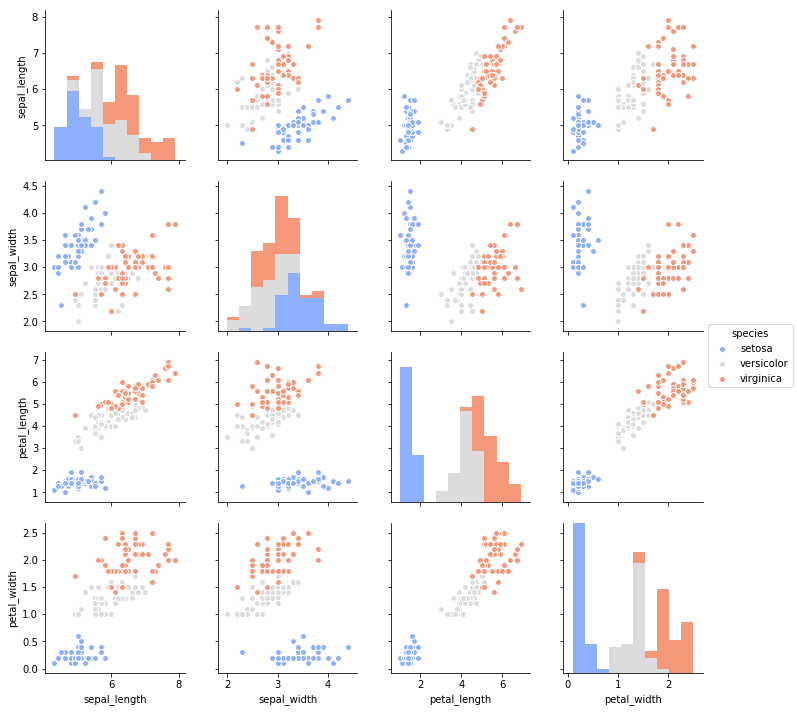

In [5]:
# Visual of data prior to pre-processing
sns.pairplot(irisData, hue = 'species', palette = 'coolwarm')

Text(0.5,1,'Sepal Width vs Species')

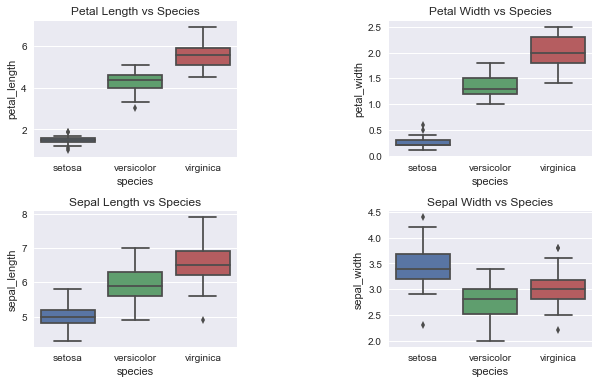

In [6]:
sns.set()
f, axes = plt.subplots(2, 2, figsize = (10, 6))
plt.subplots_adjust(wspace = 0.75)
plt.subplots_adjust(hspace = 0.40)

sns.boxplot(x = 'species', y = 'petal_length', data = irisData, ax = axes[0][0]).set_title('Petal Length vs Species')
sns.boxplot(x = 'species', y = 'petal_width', data = irisData, ax = axes[0][1]).set_title('Petal Width vs Species')
sns.boxplot(x = 'species', y = 'sepal_length', data = irisData, ax = axes[1][0]).set_title('Sepal Length vs Species')
sns.boxplot(x = 'species', y = 'sepal_width', data = irisData, ax = axes[1][1]).set_title('Sepal Width vs Species')

In [7]:
# Make a copy so when we pre-process we don't lose the original data
irisProcessed = irisData.copy()

# Create new ratio columns
irisProcessed['sLength vs sWidth'] = irisProcessed['sepal_length']/irisProcessed['sepal_width']
irisProcessed['pLength vs pWidth'] = irisProcessed['petal_length']/irisProcessed['petal_width']

Text(0.5,1,'Petal Ratio vs Species')

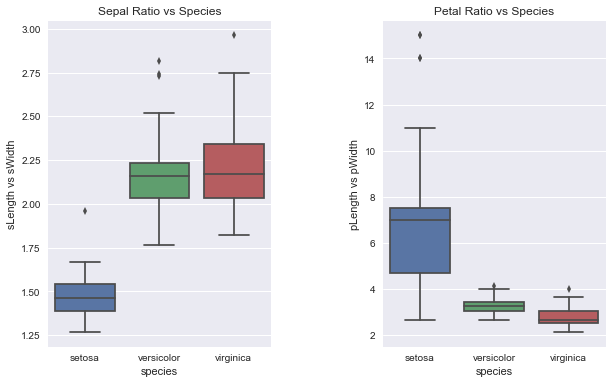

In [8]:
# Plot ratios
f, axes = plt.subplots(1, 2, figsize = (10, 6))
plt.subplots_adjust(wspace = .50)

sns.boxplot(x = 'species', y = 'sLength vs sWidth', data = irisProcessed, ax = axes[0]).set_title('Sepal Ratio vs Species')
sns.boxplot(x = 'species', y = 'pLength vs pWidth', data = irisProcessed, ax = axes[1]).set_title('Petal Ratio vs Species')

In [9]:
# Petal vs Sepal Ratios
irisProcessed['pLength vs sLength'] = irisProcessed['petal_length']/irisProcessed['sepal_length']
irisProcessed['pWidth vs sWidth'] = irisProcessed['petal_width']/irisProcessed['sepal_width']

Text(0.5,1,'Petal-Sepal Width Ratio vs Species')

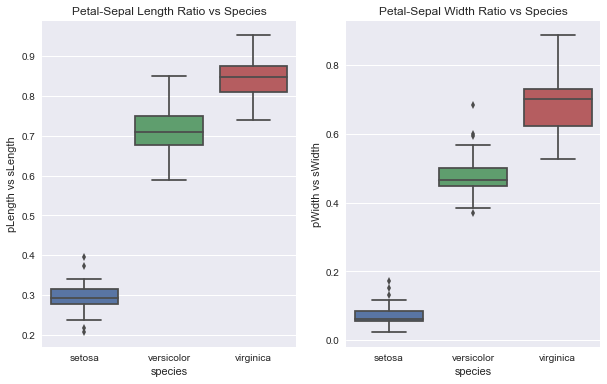

In [10]:
f, axes = plt.subplots(1, 2, figsize = (10, 6))

sns.boxplot(x = 'species', y = 'pLength vs sLength', data = irisProcessed, ax = axes[0]).set_title('Petal-Sepal Length Ratio vs Species')
sns.boxplot(x = 'species', y = 'pWidth vs sWidth', data = irisProcessed, ax = axes[1]).set_title('Petal-Sepal Width Ratio vs Species')

__Part 1 - Conclusions__
<br>
<br>
_Iris Setosa_
<br>
<br>
Iris setosa has a distinctly large sepal width. On average, Iris setosa's sepal width nearly equals its sepal length. Meanwhile, Iris setosa's other characteristics are small in comparison to the other species. A comparatively large sepal width, and shorter sepal length provides a stronger support for the flower petals. This extra support suggests that Iris setosa may inhabit regions that are naturally tough. Likewise, Iris setosa may be able to tolerate many more terrains than the other species. Additionally, thanks to some of its distinguishing traits, the machine learning model will likely be able to identify Iris setosa very effectively.
<br>
<br>
<br>
_Iris Virginica_
<br>
<br>
Of the three species, Iris virginica had the largest petal length and width as well as the greatest sepal length. Thus, when trying to identify the species it is safe to say that Iris virginica will frequently be the largest. The biological reason behind Iris virginica's large petals may be to get an edge on attracting pollinators. To increase its chances of pollination Iris virginica likely grew larger petals. A species cannot just decide to grow; however, over time the concept survival of the fittest makes its mark. The large petal length and width requires extra support, thus, an accompanying large sepal length intuitively makes sense.
<br>
<br>
<br>
_Iris Versicolor_
<br>
<br>
Iris versicolor appears to be a slightly smaller version of Iris virginica. Their features in this data set are very similar, leading them to be more difficult to distinguish based on this data alone. This could become a problem for the machine learning model. When the model is attempting to predict the species, expect most of the error to be caused by the small differentiation between Iris virginica and Iris versicolor.
<br>
<br>
Data visualization has led to several insights about how to differentiate the species. The machine learning model will notice the same differences as it processes the data.

__Part 2 - Classifying the Flower Samples using Machine Learning__
<br>
<br>
_Overview_
<br>
<br>
The goal for analyzing the Iris flower data set and creating a machine learning model is to predict which species a given flower is based on its characteristics. Having explored and visualized the data set, we now have a greater understanding of the three Iris flower species. Two key observations were,

- Iris setosa should be fairly easy to distinguish.
- Expect error when model is guessing either Iris virginica or Iris versicolor.

Additionally, since the names of the species are strings they cannot be entered into the model without a label encoder. The label encoder will assign each string with a number. Iris setosa will be 0, Iris versicolor will be 1, and Iris virginica will be 2.
<br>
<br>
<br>
_Train-Test Split_
<br>
<br>
A machine learning algorithm demands large sets of data because it requires training and testing data. The training data is generally the bulk of the data, while a smaller portion is left for testing. Often times, a 70-30 or 80-20 split will be used. It is vital not to over or under train the model. Over-training the model can lead to over-fitting. The model becomes specialized for the specific data set and may have little real world practicality. On the other hand, under-training the model will lead to ineffectiveness. After processing the known data, the model will be given testing data. The testing data will consist of: sepal length, sepal width, petal length and petal width. It is important to drop the species column because that is what is being tested. The process is similar to data visualization; however, a machine can process data much quicker than the human mind.
<br>
<br>
<br>
_Confusion Matrix_
<br>
<br>
A confusion matrix provides a report of values which compare the model's predictions to the actual species of flower. The matrix can be thought of as a table, where predicted species is on the columns and actual species is the rows. Suppose a confusion matrix was returned of the form,

$$ \left(\begin{array}{cc} 
3 & 0 & 1\\
0 & 5 & 0\\
1 & 0 & 4
\end{array}\right) $$

Think of it as a table,

| Actual/Predicted | Iris setosa  | Iris versicolor  | Iris virginica |
|---|---|---|---|
|Iris setosa| 3  | 0  | 1  |
|Iris versicolor| 0  | 5  | 0  |
|Iris virginica| 1  | 0  | 4  |

This table means that there were three true positives of Iris setosa, five true positives of Iris versicolor and 4 true positives of Iris virginica. There are two total false positives. One Iris setosa was predicted to be an Iris virginica, and one Iris virginica was predicted to be an Iris setosa. Confusion matrices are very helpful when trying to visualize the model's prediction.
<br>
<br>
<br>
_Classification Report_
<br>
<br>
The classification report is a slightly more complex visual of the prediction results. The report is divided into four columns: precision, recall, f1-score and support. Precision is how accurately the model predicted. Mathematically, precision is the ratio of true positives to the sum of true and false positives. For example, if the model predicted thirteen Iris versicolor but there was actually only twelve, the precision is $\frac{12}{13} \approx .92$. Recall is the ratio of true positives to the sum of true positives and false negatives. Recall is slightly different from precision as it considers only positive instances. The f1-score is a weighted mean of precision and recall. Finally, support is the actual number of occurrences for each class.
<br>
<br>
<br>
_Machine Learning Algorithms_
<br>
<br>
There are several machine learning algorithms that can complete the task at hand. The algorithms we will test are: Support Vector Classification and the K-Nearest Neighbors Classifier. Each algorithm will produce its own confusion matrices and classification reports.
<br>
<br>
<br>
__Support Vector Classification (SVC)__
<br>
<br>
Support vector classification is a subgroup of support vector machines, which are supervised learning models that can be used for classification purposes. The idea behind this algorithm is attempting to fit vectors to data and finding the best possible fits. Then, the species will be classified based on how its data fits with the vectors created by the model.

In [11]:
# Model I want
from sklearn.svm import SVC

# Name I'm giving it
svc_model = SVC()

# Convert species into numerical form so it can be represented
le = preprocessing.LabelEncoder()
irisProcessed['species'] = le.fit_transform(irisProcessed['species'])

X = irisProcessed.drop(['species'], axis = 1)
y = irisProcessed['species']

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30)

In [14]:
# Train model
svc_model.fit(X_train, y_train)

# Test model
predictions = svc_model.predict(X_test)

In [15]:
# Results in confusion matrix
cm = confusion_matrix(y_test, predictions)
print(cm)

[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


In [16]:
# Results as a classification report
cr = classification_report(y_test, predictions)
print(cr)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        14
          1       0.94      0.94      0.94        18
          2       0.92      0.92      0.92        13

avg / total       0.96      0.96      0.96        45



In [17]:
# Repeat process, see different results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30)

# Train model
svc_model.fit(X_train, y_train)

# Test model
predictions1 = svc_model.predict(X_test)

# Results in confusion matrix
cm1 = confusion_matrix(y_test, predictions1)
print(cm1)

# Results as a classification report
cr1 = classification_report(y_test, predictions1)
print(cr1)

[[15  0  0]
 [ 0  9  2]
 [ 0  1 18]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       0.90      0.82      0.86        11
          2       0.90      0.95      0.92        19

avg / total       0.93      0.93      0.93        45



__K-Nearest Neighbors Classifier (KNN)__
<br>
<br>
The method of identification in this algorithm is analogous to a majority vote. Think of the species as candidates that are points on a plot and the voters are the data. The point that has the most "voters" within the $k$-nearest neighbors of the point will be identified as a certain species. Parameter, $k$, is any integer, of which has an optimal value that is dependent on the data. Additionally, the distance formula is very important to the KNN algorithm. Here is a visual of what is going on,

<img src = "knn.png">

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
# Model I want and its k-value = 4
kmodel = KNeighborsClassifier(n_neighbors = 3)  

# TTS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30)

# Train model
kmodel.fit(X_train, y_train)

# Test Model
k_predictions = kmodel.predict(X_test)

k_cm = confusion_matrix(y_test, k_predictions)
print(k_cm)

k_cr = classification_report(y_test, k_predictions)
print(k_cr)

[[12  0  0]
 [ 0 16  0]
 [ 0  2 15]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        12
          1       0.89      1.00      0.94        16
          2       1.00      0.88      0.94        17

avg / total       0.96      0.96      0.96        45



In [20]:
# Change k-value
kmodel = KNeighborsClassifier(n_neighbors = 5)  

# TTS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30)

# Train model
kmodel.fit(X_train, y_train)

# Test Model
k_predictions = kmodel.predict(X_test) 

# Confusion matrix
k_cm = confusion_matrix(y_test, k_predictions)
print(k_cm)

# Classification report
k_cr = classification_report(y_test, k_predictions)
print(k_cr)

[[18  0  0]
 [ 0 11  1]
 [ 0  3 12]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        18
          1       0.79      0.92      0.85        12
          2       0.92      0.80      0.86        15

avg / total       0.92      0.91      0.91        45



__Part 2 - Conclusion__
<br>
<br>
SVC and KNN are both effective predictive models. KNN is a fairly simple, speedy algorithm that performs very well. SVC is a bit more complex, but also returns accurate predictions. The Iris flower data set was very friendly towards both algorithms and worked well for both. When data sets get more complex and machine learning models need to work in higher dimensional spaces, SVC will prove to be the more effective model. Understanding both is a great skill for anyone to add. Having the ability to analyze data is vital in today's world. Nearly every industry, from healthcare to entertainment, uses data analysis in some capacity. Developing an understanding of data visualization and machine learning, then being able to draw conclusions is very valuable. For example, as expected the model correctly predicted which flower was the Iris setosa nearly every runthrough. Moreover, when a false positive or false negative occurs it is more likely than not an Iris versicolor being identified as an Iris virginica or vice versa. Each of the previous statements was a conclusion drawn from data visualization. Data visualization and machine learning are different, but we've learned that they each hold an important role in data analysis.

Sources:
<br>
https://en.wikipedia.org/wiki/Confusion_matrix
<br>
https://en.wikipedia.org/wiki/Iris_flower_data_set
<br>
https://en.wikipedia.org/wiki/Iris_setosa
<br>
https://en.wikipedia.org/wiki/Iris_versicolor
<br>
https://en.wikipedia.org/wiki/Iris_virginica
<br>
https://en.wikipedia.org/wiki/Machine_learning
<br>
https://scikit-learn.org/stable/modules/neighbors.html#classification